# PROBLEM DEFINITION:
# IN THIS PROJECT WE WILL TRY TO BUILD A MACHINE LEARNING MODEL TO PEDICT THE COST VARIATION WITH RESPECT TO THE LOCALITY , CITY , CUSINE AND RATINGS.
# WE HAVE BEEN GIVEN A TRAINING AND TESTING DATA-SET TO PREDCIT THE COST VARIAITON.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

# LOADING THE TRAINING DATA-SET

In [2]:
dftr = pd.read_excel (r'D:\Arunkumar M data science\Restaurant_food_cost\Participants_Data_Final\Data_Train.xlsx')
dftr

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# EXPLORATORY DATA ANALYSIS AND PRE-PROCESSING PIPIELINE:

# NOW WE WILL REMOVE THE VOTES FROM THE VOTES COLUMN.

In [3]:
dftr["VOTES"]=dftr["VOTES"].str.rstrip("votes")
dftr

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


# SINCE THE "RESTAURANT_ID","TIME" DOESNOT GIVE ANY IMPORTANT INFORMATION THAT COULD HELP US TO BUILD THE MACHNE LEARNING MODEL.

In [4]:
dftr.drop(["RESTAURANT_ID","TIME"],axis=1,inplace=True)
dftr

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR","Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32,400


In [5]:
dftr["TITLE"].value_counts()

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
DESSERT PARLOR,PAAN SHOP           1
CAFÉ,FINE DINING                   1
BAKERY,CONFECTIONERY               1
KIOSK,FOOD COURT                   1
CASUAL DINING,DESSERT PARLOR       1
Name: TITLE, Length: 113, dtype: int64

# REFINING THE TITLE COLUMN.

In [8]:
dftr["TITLE"] = dftr["TITLE"].str.split(",").str[0]
dftr

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200
1,CASUAL DINING,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546,500
12686,CASUAL DINING,"Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32,400


# FINDING NaN VALUES

In [9]:
dftr.isnull().sum()


TITLE          0
CUISINES       0
CITY         112
LOCALITY      98
RATING         2
VOTES       1204
COST           0
dtype: int64

# SINCE CUISINES COLUMN HAS A LOT OF INFORMATION WE WILL TRY TO SEGREGATE THE VALUES INDIVIDUALLY. 

In [10]:
dftr["CUISINES1"] = dftr["CUISINES"].str.split(",").str[0]
dftr["CUISINES2"] = dftr["CUISINES"].str.split(",").str[1]
dftr["CUISINES3"] = dftr["CUISINES"].str.split(",").str[2]
dftr

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian
1,CASUAL DINING,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800,North Indian,Chinese,Biryani
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800,Tibetan,Chinese,NaN
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300,Desserts,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab",Hyderabad,Gachibowli,3.8,546,500,North Indian,Burger,Kebab
12686,CASUAL DINING,"Goan, Continental",Mumbai,Bandra Kurla Complex,4.3,1214,1800,Goan,Continental,NaN
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",Navi Mumbai,Vashi,4.0,608,1300,Finger Food,Continental,Asian
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",Chennai,Maduravoyal,3.5,32,400,North Indian,South Indian,Chinese


In [11]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TITLE      12690 non-null  object
 1   CUISINES   12690 non-null  object
 2   CITY       12578 non-null  object
 3   LOCALITY   12592 non-null  object
 4   RATING     12688 non-null  object
 5   VOTES      11486 non-null  object
 6   COST       12690 non-null  int64 
 7   CUISINES1  12690 non-null  object
 8   CUISINES2  9628 non-null   object
 9   CUISINES3  5691 non-null   object
dtypes: int64(1), object(9)
memory usage: 991.5+ KB


In [12]:
dftr.head(5)

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian
1,CASUAL DINING,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800,North Indian,Chinese,Biryani
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800,Tibetan,Chinese,NaN
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300,Desserts,NaN,NaN


# SINCE WE HAVE SEPERATED THE CUISINES INTO CUISINES1,CUISINES2 AND CUISINES3. WE WILL NOW DROP THE CUISINES COLUMN.

In [13]:
dftr.drop(["CUISINES"],axis=1,inplace=True)
dftr

,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian
1,CASUAL DINING,Chennai,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese
2,CASUAL DINING,Chennai,Saligramam,3.8,221,800,North Indian,Chinese,Biryani
3,QUICK BITES,Mumbai,Bandra West,4.1,24,800,Tibetan,Chinese,NaN
4,DESSERT PARLOR,Mumbai,Lower Parel,3.8,165,300,Desserts,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,Hyderabad,Gachibowli,3.8,546,500,North Indian,Burger,Kebab
12686,CASUAL DINING,Mumbai,Bandra Kurla Complex,4.3,1214,1800,Goan,Continental,NaN
12687,LOUNGE,Navi Mumbai,Vashi,4.0,608,1300,Finger Food,Continental,Asian
12688,CASUAL DINING,Chennai,Maduravoyal,3.5,32,400,North Indian,South Indian,Chinese


In [14]:
dftr["CITY"].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [15]:
dftr["LOCALITY"].value_counts()

Gachibowli                      166
Indiranagar                     138
Edappally                       122
Kakkanad                        121
HSR                             120
                               ... 
Koramangala 6 Block               1
1st Stage                         1
Temple View Colony                1
Opposite JNU East Gate            1
Outer Circle Connaught Place      1
Name: LOCALITY, Length: 1416, dtype: int64

In [16]:
dftr.isnull().sum()

TITLE           0
CITY          112
LOCALITY       98
RATING          2
VOTES        1204
COST            0
CUISINES1       0
CUISINES2    3062
CUISINES3    6999
dtype: int64

In [17]:
dftr.head(3)

,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,Thane,Dombivali East,3.6,49,1200,Malwani,Goan,North Indian
1,CASUAL DINING,Chennai,Ramapuram,4.2,30,1500,Asian,Modern Indian,Japanese
2,CASUAL DINING,Chennai,Saligramam,3.8,221,800,North Indian,Chinese,Biryani


# NOW WE WILL CONVERT THE DATA-SET IN TO UPPER CASE TO MAKE THAT EASY FOR LABEL FINDER TO TRANSFORM THEM INTO NUMERICAL VALUES. 

In [18]:
dftr["LOCALITY"]=dftr["LOCALITY"].str.upper()
dftr["CITY"]=dftr["CITY"].str.upper()
dftr["CUISINES1"]=dftr["CUISINES1"].str.upper()
dftr["CUISINES2"]=dftr["CUISINES2"].str.upper()
dftr["CUISINES3"]=dftr["CUISINES3"].str.upper()
dftr


,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,THANE,DOMBIVALI EAST,3.6,49,1200,MALWANI,GOAN,NORTH INDIAN
1,CASUAL DINING,CHENNAI,RAMAPURAM,4.2,30,1500,ASIAN,MODERN INDIAN,JAPANESE
2,CASUAL DINING,CHENNAI,SALIGRAMAM,3.8,221,800,NORTH INDIAN,CHINESE,BIRYANI
3,QUICK BITES,MUMBAI,BANDRA WEST,4.1,24,800,TIBETAN,CHINESE,NaN
4,DESSERT PARLOR,MUMBAI,LOWER PAREL,3.8,165,300,DESSERTS,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,HYDERABAD,GACHIBOWLI,3.8,546,500,NORTH INDIAN,BURGER,KEBAB
12686,CASUAL DINING,MUMBAI,BANDRA KURLA COMPLEX,4.3,1214,1800,GOAN,CONTINENTAL,NaN
12687,LOUNGE,NAVI MUMBAI,VASHI,4.0,608,1300,FINGER FOOD,CONTINENTAL,ASIAN
12688,CASUAL DINING,CHENNAI,MADURAVOYAL,3.5,32,400,NORTH INDIAN,SOUTH INDIAN,CHINESE


In [19]:
dftr.isnull().sum()

TITLE           0
CITY          112
LOCALITY       98
RATING          2
VOTES        1204
COST            0
CUISINES1       0
CUISINES2    3062
CUISINES3    6999
dtype: int64

In [20]:
dftr["VOTES"]=dftr["VOTES"].astype(float)

In [21]:
dftr["RATING"]=dftr["RATING"].replace("-","0")

In [22]:
dftr["RATING"]=dftr["RATING"].replace("NEW","0")

In [23]:
dftr["RATING"].value_counts()

3.9    1238
0      1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

# NOW WE WILL TRY TO FILL THE NaN VALUES WITH MEAN AND OTHERS IN REQUIRED VALUES.

In [24]:
dftr["RATING"]=dftr["RATING"].astype(float)

In [ ]:
dftr["VOTES"].fillna(dftr["VOTES"].mean(),inplace=True)
dftr["RATING"].fillna(dftr["RATING"].mean(),inplace=True)
dftr["CITY"].fillna("others",inplace=True)
dftr["LOCALITY"].fillna("others",inplace=True)
dftr["CUISINES2"].fillna("others",inplace=True)
dftr["CUISINES3"].fillna("others",inplace=True)
dftr

# USING LABEL ENCODER TO TRANFORM THE STRING VALUES INTO NUMERICAL VALUES.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dftr["TITLE"]=le.fit_transform(dftr["TITLE"])
dftr["CITY"]=le.fit_transform(dftr["CITY"])
dftr["LOCALITY"]=le.fit_transform(dftr["LOCALITY"])
dftr["CUISINES1"]=le.fit_transform(dftr["CUISINES1"])
dftr["CUISINES2"]=le.fit_transform(dftr["CUISINES2"])
dftr["CUISINES3"]=le.fit_transform(dftr["CUISINES3"])
dftr


,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,4,326,279,3.6,49.0,1200,59,32,66
1,4,67,1037,4.2,30.0,1500,6,60,41
2,4,67,1092,3.8,221.0,800,72,23,12
3,21,225,127,4.1,24.0,800,100,23,93
4,8,225,613,3.8,165.0,300,28,98,93
...,...,...,...,...,...,...,...,...,...
12685,21,133,333,3.8,546.0,500,72,17,44
12686,4,225,124,4.3,1214.0,1800,37,25,93
12687,14,241,1338,4.0,608.0,1300,34,25,4
12688,4,67,619,3.5,32.0,400,72,84,21


# BASIC STATISTICAL DATA

In [27]:
dftr.describe()

,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,11.563357,145.677305,654.715524,3.426836,415.668901,655.252246,49.238298,55.764145,68.954058
std,8.227629,87.960147,402.540077,1.179014,801.745630,627.003540,28.530149,32.496810,31.535809
min,0.000000,0.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.000000,0.000000
25%,4.000000,67.000000,330.000000,3.400000,64.000000,300.000000,25.000000,23.000000,37.000000
50%,9.000000,133.000000,583.000000,3.800000,200.000000,500.000000,48.000000,61.000000,93.000000
75%,21.000000,225.000000,1004.000000,4.000000,415.668901,800.000000,72.000000,93.000000,93.000000
max,22.000000,354.000000,1398.000000,4.900000,41186.000000,14000.000000,103.000000,98.000000,93.000000


In [28]:
dftr.isnull().sum()

TITLE        0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
COST         0
CUISINES1    0
CUISINES2    0
CUISINES3    0
dtype: int64

# FINDING CORRELATION BETWEEN THE COLUMNS ACROSS THE DATA-SET.

<AxesSubplot:>

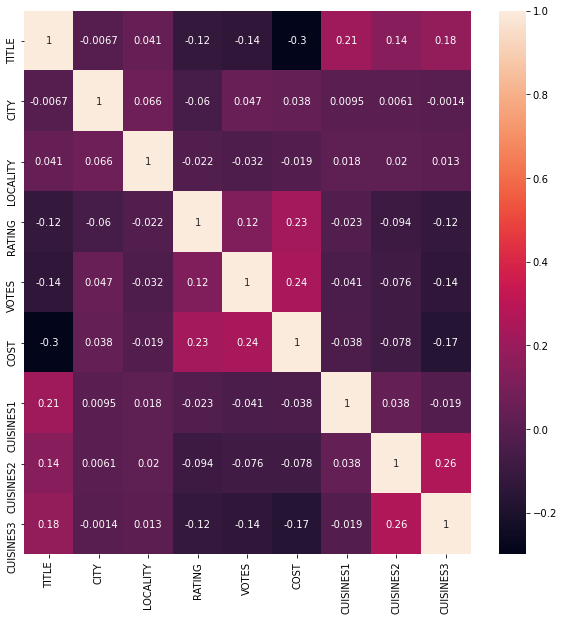

In [29]:
corr=dftr.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True)

# PLOTTING THE OUTLIIERS

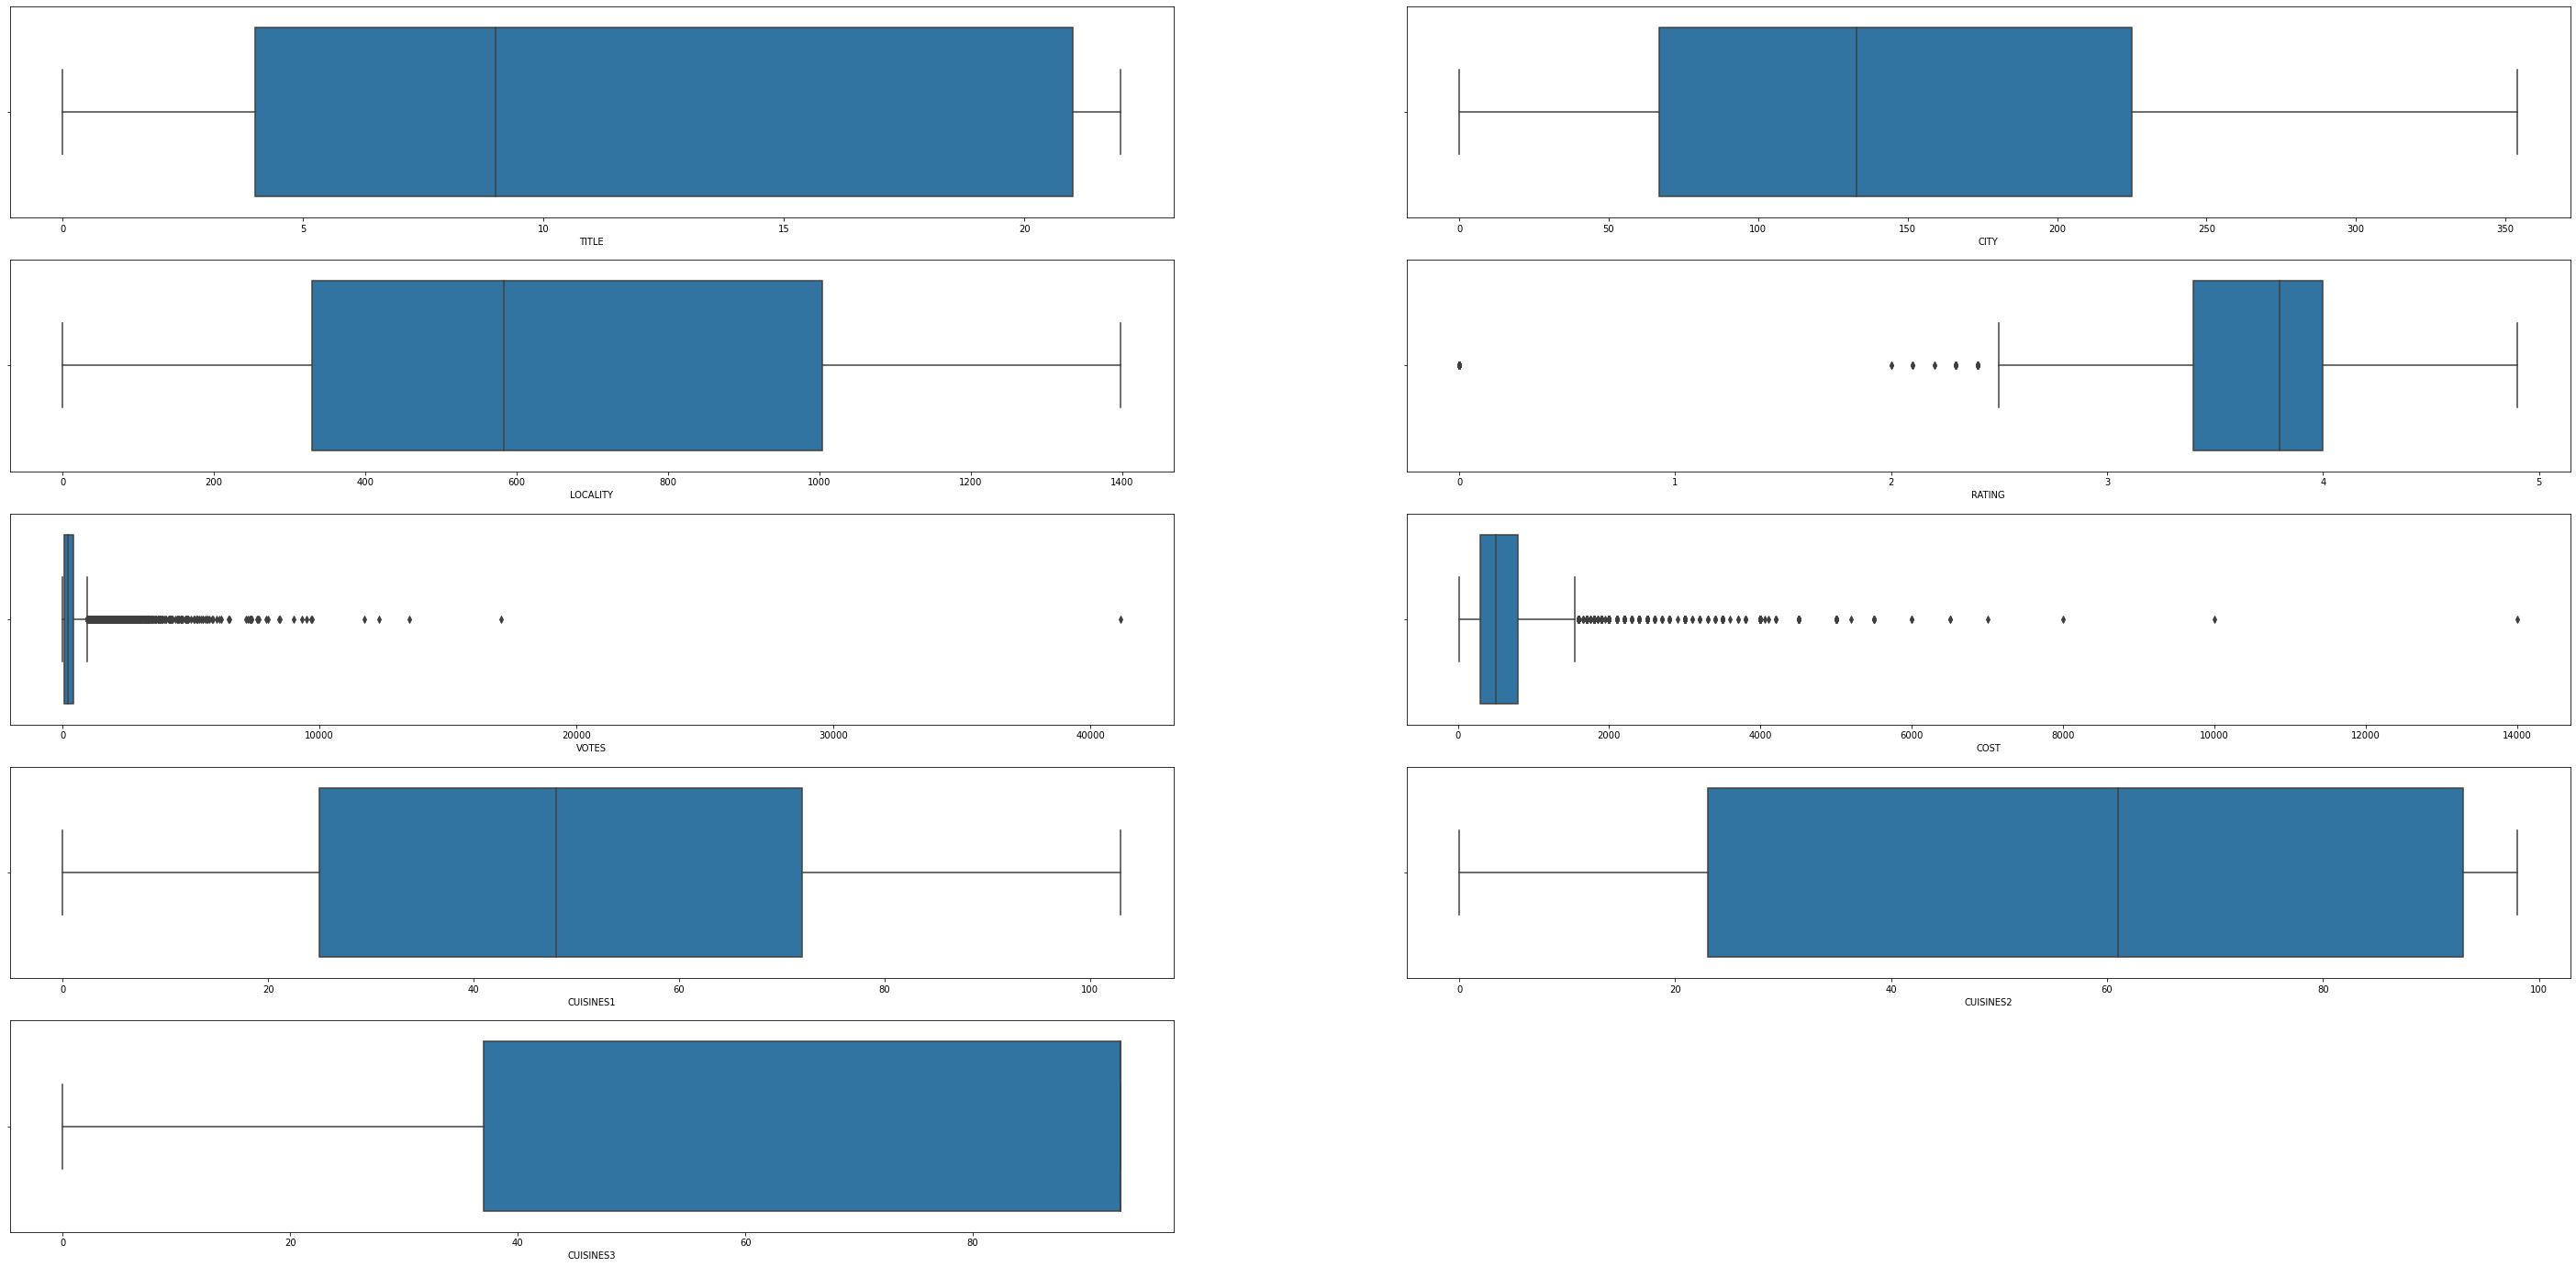

In [30]:
collist=dftr.columns.values
ncol=2
nrow=10
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(dftr[collist[i]])

# IMPLEMENTING Z-SCORE

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(dftr))
z

array([[0.91929951, 2.05013073, 0.93339856, ..., 0.3421674 , 0.73130506,
        0.09367683],
       [0.91929951, 0.89450061, 0.94971796, ..., 1.51558978, 0.13035193,
        0.88645768],
       [0.91929951, 0.89450061, 1.0863557 , ..., 0.79784369, 1.00826624,
        1.80608346],
       ...,
       [0.29616541, 1.08374593, 1.69749906, ..., 0.53413316, 0.94671931,
        2.05977333],
       [0.91929951, 0.89450061, 0.08872888, ..., 0.79784369, 0.86891507,
        1.52068236],
       [0.91929951, 0.14413123, 1.67514015, ..., 0.79784369, 1.00826624,
        0.76252648]])

# NOW WE WILL TRY TO REMOVE THE DATA'S WHICH DOESNT FIT IN THE CONDITION.

In [32]:
threshold=3
dftr_new=dftr[(z<3).all(axis=1)]
dftr_new

,TITLE,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3
0,4,326,279,3.6,49.0,1200,59,32,66
1,4,67,1037,4.2,30.0,1500,6,60,41
2,4,67,1092,3.8,221.0,800,72,23,12
3,21,225,127,4.1,24.0,800,100,23,93
4,8,225,613,3.8,165.0,300,28,98,93
...,...,...,...,...,...,...,...,...,...
12685,21,133,333,3.8,546.0,500,72,17,44
12686,4,225,124,4.3,1214.0,1800,37,25,93
12687,14,241,1338,4.0,608.0,1300,34,25,4
12688,4,67,619,3.5,32.0,400,72,84,21


# FINDING SKEWNESS

In [33]:
dftr_new.skew()

TITLE        0.063978
CITY         0.275811
LOCALITY     0.343570
RATING      -2.185701
VOTES        2.531366
COST         1.822529
CUISINES1    0.020244
CUISINES2    0.054303
CUISINES3   -0.842223
dtype: float64

# PREPARING TRAINING DATA-SET FOR TRAINING AND TESTING

In [34]:
x=dftr_new.drop("COST",axis=1)
y=dftr_new["COST"]

# STANDARDISING THE DATA-SET WITH STANDARD SCALER

In [35]:
#USING STANDARD SCALER FOR STANDARDISING THE DATA-SET
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
x=stc.fit_transform(x)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [37]:
x_train.shape

(9569, 8)

In [38]:
y_train.shape

(9569,)

In [39]:
x_test.shape

(2700, 8)

In [40]:
y_test.shape

(2700,)

# MACHINE LEARNING MODELS 
# For the above data-set we will use
# 1.LINEAR REGRESSION
# 2.RANDOM FOREST REGRESSOR
# 3.SGD REGRESSOR
# 4.LASSO
# 5.RIDGE
# 6.SVR

In [41]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=28.107506393751226,cross_value_score=29.092944625370613,and difference=-0.985438231619387


In [42]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=64.49847188977698,cross_value_score=67.14622449561539,and difference=-2.6477526058384058


In [43]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGD,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=28.107506393751226,cross_value_score=28.952599747433695,and difference=-0.8450933536824685


In [44]:
#LASSO
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
y_pred=la.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(la,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=28.137581648029464,cross_value_score=29.092311018213536,and difference=-0.9547293701840722


In [45]:
#RIDGE
from sklearn.linear_model import Ridge
Ri=Ridge()
Ri.fit(x_train,y_train)
y_pred=Ri.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(Ri,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=28.10779240806086,cross_value_score=29.092983984528985,and difference=-0.9851915764681252


In [46]:
#SVR
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(svr,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=15.32351669964438,cross_value_score=13.193499083866639,and difference=2.1300176157777404


# Hyper parameter Tuning RandomForestRegressor using GridSearchCV

In [51]:
#Hyper parameter Tuning RandomForestRegressor using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"n_estimators" :[1,10,100], "random_state": list(range(0,10))}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_estimators': 100, 'random_state': 6}


In [72]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
rf.fit(x_train,y_train)
pred_train=rf.predict(x_train)
pred_test=rf.predict(x_test)
accuracy=r2_score(y_test,pred_test)
for i in range(2,10):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

At cv :  2 
cross val score is :  65.19008592582803 
r2_score is:  64.32111671295412
******************************************************************************



At cv :  3 
cross val score is :  66.73166220592141 
r2_score is:  64.32111671295412
******************************************************************************



At cv :  4 
cross val score is :  66.67822534468056 
r2_score is:  64.32111671295412
******************************************************************************



At cv :  5 
cross val score is :  66.73140661437894 
r2_score is:  64.32111671295412
******************************************************************************



At cv :  6 
cross val score is :  66.89569207873909 
r2_score is:  64.32111671295412
******************************************************************************



At cv :  7 
cross val score is :  66.98275094652266 
r2_score is:  64.32111671295412
******************************************************************************



# FROM THE ABOVE WE CAN SEE THAT THE RANDOM FOREST REGRESSOR IS GIVING US THE HIGHER ACCURACY RATE WHEN COMPARED TO ALL OTHER MACHINE LEARNING MODELS.
# WE WILL USE THE RANDOM FOREST REGRESSOR MACHINE MODEL TO PREDICT THE TEST DATA-SET.

# SAVING THE MODEL

In [73]:
import pickle
filename="Restaurant_food_cost.pkl"
pickle.dump(rf,open(filename,"wb"))

# LOADING THE TEST DATA-SET

In [74]:
dfte = pd.read_excel (r'D:\Arunkumar M data science\Restaurant_food_cost\Participants_Data_Final\Data_Test.xlsx')
dfte

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# NOW WE WILL REMOVE THE VOTES FROM THE VOTES COLUMN.

In [75]:
dfte["VOTES"]=dfte["VOTES"].str.rstrip("votes")
dfte

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# SINCE THE "RESTAURANT_ID","TIME" DOESNOT GIVE ANY IMPORTANT INFORMATION THAT COULD HELP US TO BUILD THE MACHNE LEARNING MODEL.

In [76]:
dfte.drop(["RESTAURANT_ID","TIME"],axis=1,inplace=True)
dfte

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350
3,None,Biryani,Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53
4229,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,NaN


# REFINING THE TITLE COLUMN.

In [77]:
dfte["TITLE"] = dfte["TITLE"].str.split(",").str[0]
dfte

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350
3,None,Biryani,Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53
4229,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,NaN


# SINCE CUISINES COLUMN HAS A LOT OF INFORMATION WE WILL TRY TO SEGREGATE THE VALUES INDIVIDUALLY.

In [78]:
dfte["CUISINES1"] = dfte["CUISINES"].str.split(",").str[0]
dfte["CUISINES2"] = dfte["CUISINES"].str.split(",").str[1]
dfte["CUISINES3"] = dfte["CUISINES"].str.split(",").str[2]
dfte

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564,North Indian,Chinese,Mughlai
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61,South Indian,Fast Food,Pizza
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350,North Indian,Seafood,Biryani
3,None,Biryani,Faridabad,NIT,3.8,1445,Biryani,NaN,NaN
4,QUICK BITES,"South Indian, Kerala",Kochi,Kaloor,3.6,23,South Indian,Kerala,NaN
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287,North Indian,Mughlai,Chinese
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469,Biryani,North Indian,Sandwich
4228,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53,Continental,North Indian,NaN
4229,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,NaN,Rolls,Beverages,NaN


# SINCE WE HAVE SEPERATED THE CUISINES INTO CUISINES1,CUISINES2 AND CUISINES3. WE WILL NOW DROP THE CUISINES COLUMN.

In [79]:
dfte.drop(["CUISINES"],axis=1,inplace=True)
dfte

,TITLE,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,Noida,Sector 18,4.3,564,North Indian,Chinese,Mughlai
1,QUICK BITES,Mumbai,Grant Road,4.2,61,South Indian,Fast Food,Pizza
2,CASUAL DINING,Mumbai,Marine Lines,3.8,350,North Indian,Seafood,Biryani
3,None,Faridabad,NIT,3.8,1445,Biryani,NaN,NaN
4,QUICK BITES,Kochi,Kaloor,3.6,23,South Indian,Kerala,NaN
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,New Delhi,Punjabi Bagh,3.9,287,North Indian,Mughlai,Chinese
4227,None,Bangalore,HSR Layout,4.3,469,Biryani,North Indian,Sandwich
4228,QUICK BITES,Faridabad,Sector 86,3.7,53,Continental,North Indian,NaN
4229,QUICK BITES,Kochi,Kochi,-,NaN,Rolls,Beverages,NaN


In [80]:
dfte["LOCALITY"]=dfte["LOCALITY"].str.upper()
dfte["CITY"]=dfte["CITY"].str.upper()
dfte["CUISINES1"]=dfte["CUISINES1"].str.upper()
dfte["CUISINES2"]=dfte["CUISINES2"].str.upper()
dfte["CUISINES3"]=dfte["CUISINES3"].str.upper()
dfte


,TITLE,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,NOIDA,SECTOR 18,4.3,564,NORTH INDIAN,CHINESE,MUGHLAI
1,QUICK BITES,MUMBAI,GRANT ROAD,4.2,61,SOUTH INDIAN,FAST FOOD,PIZZA
2,CASUAL DINING,MUMBAI,MARINE LINES,3.8,350,NORTH INDIAN,SEAFOOD,BIRYANI
3,None,FARIDABAD,NIT,3.8,1445,BIRYANI,NaN,NaN
4,QUICK BITES,KOCHI,KALOOR,3.6,23,SOUTH INDIAN,KERALA,NaN
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,NEW DELHI,PUNJABI BAGH,3.9,287,NORTH INDIAN,MUGHLAI,CHINESE
4227,None,BANGALORE,HSR LAYOUT,4.3,469,BIRYANI,NORTH INDIAN,SANDWICH
4228,QUICK BITES,FARIDABAD,SECTOR 86,3.7,53,CONTINENTAL,NORTH INDIAN,NaN
4229,QUICK BITES,KOCHI,KOCHI,-,NaN,ROLLS,BEVERAGES,NaN


# FINDING NaN VALUES

In [81]:
dfte.isnull().sum()

TITLE           0
CITY           35
LOCALITY       30
RATING          2
VOTES         402
CUISINES1       0
CUISINES2     985
CUISINES3    2331
dtype: int64

In [82]:
dfte["VOTES"]=dfte["VOTES"].astype(float)
dfte["RATING"]=dfte["RATING"].replace("-","0")
dfte["RATING"]=dfte["RATING"].replace("NEW","0")
dfte["RATING"]=dfte["RATING"].astype(float)

# NOW WE WILL TRY TO FILL THE NaN VALUES WITH MEAN AND OTHERS IN REQUIRED VALUES.

In [83]:
dfte["VOTES"].fillna(dfte["VOTES"].mean(),inplace=True)
dfte["RATING"].fillna(dfte["RATING"].mean(),inplace=True)
dfte["CITY"].fillna("others",inplace=True)
dfte["LOCALITY"].fillna("others",inplace=True)
dfte["CUISINES2"].fillna("others",inplace=True)
dfte["CUISINES3"].fillna("others",inplace=True)
dfte

,TITLE,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,CASUAL DINING,NOIDA,SECTOR 18,4.3,564.000000,NORTH INDIAN,CHINESE,MUGHLAI
1,QUICK BITES,MUMBAI,GRANT ROAD,4.2,61.000000,SOUTH INDIAN,FAST FOOD,PIZZA
2,CASUAL DINING,MUMBAI,MARINE LINES,3.8,350.000000,NORTH INDIAN,SEAFOOD,BIRYANI
3,None,FARIDABAD,NIT,3.8,1445.000000,BIRYANI,others,others
4,QUICK BITES,KOCHI,KALOOR,3.6,23.000000,SOUTH INDIAN,KERALA,others
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,NEW DELHI,PUNJABI BAGH,3.9,287.000000,NORTH INDIAN,MUGHLAI,CHINESE
4227,None,BANGALORE,HSR LAYOUT,4.3,469.000000,BIRYANI,NORTH INDIAN,SANDWICH
4228,QUICK BITES,FARIDABAD,SECTOR 86,3.7,53.000000,CONTINENTAL,NORTH INDIAN,others
4229,QUICK BITES,KOCHI,KOCHI,0.0,429.769391,ROLLS,BEVERAGES,others


# USING LABEL ENCODER TO TRANFORM THE STRING VALUES INTO NUMERICAL VALUES.

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfte["TITLE"]=le.fit_transform(dfte["TITLE"])
dfte["CITY"]=le.fit_transform(dfte["CITY"])
dfte["LOCALITY"]=le.fit_transform(dfte["LOCALITY"])
dfte["CUISINES1"]=le.fit_transform(dfte["CUISINES1"])
dfte["CUISINES2"]=le.fit_transform(dfte["CUISINES2"])
dfte["CUISINES3"]=le.fit_transform(dfte["CUISINES3"])
dfte

,TITLE,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,5,111,658,4.3,564.000000,60,19,56
1,22,97,216,4.2,61.000000,73,24,61
2,5,97,406,3.8,350.000000,60,69,13
3,19,42,522,3.8,1445.000000,12,81,80
4,22,79,295,3.6,23.000000,73,42,80
...,...,...,...,...,...,...,...,...
4226,5,109,593,3.9,287.000000,60,57,19
4227,19,8,246,4.3,469.000000,12,59,65
4228,22,42,692,3.7,53.000000,22,59,80
4229,22,79,327,0.0,429.769391,67,10,80


# STANDARDISING THE DATA-SET WITH STANDARD SCALER

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfte_new=sc.fit_transform(dfte)
dfte_new

array([[-0.89217332,  1.28071294,  1.15657681, ...,  0.83555432,
        -1.01302452, -0.16361857],
       [ 1.14178391,  0.92998825, -0.70778628, ...,  1.39387968,
        -0.82809521,  0.02820979],
       [-0.89217332,  0.92998825,  0.09363677, ...,  0.83555432,
         0.83626864, -1.81334247],
       ...,
       [ 1.14178391, -0.44785874,  1.29998936, ..., -0.79647367,
         0.46641   ,  0.75715755],
       [ 1.14178391,  0.47905651, -0.2395865 , ...,  1.13619105,
        -1.34589729,  0.75715755],
       [ 1.14178391, -1.32467047,  0.80226346, ...,  0.70671   ,
         1.28009899,  0.75715755]])

# FITIING THE MODEL AND LOADING THE JOB FILE FOR PREDICTION.

In [86]:
fitted_model=pickle.load(open("Restaurant_food_cost.pkl","rb"))

In [87]:
fitted_model

RandomForestRegressor()

In [88]:
predictions=fitted_model.predict(dfte_new)

In [89]:
predictions

array([1150. ,  380. ,  615.5, ...,  466. ,  342.7,  296. ])

# CONCLUSION REMARKS:
   WE COULD SEE THAT THE MACHINE LEARNING MODELS HAVE PERFORMED WELL. EVEN THOUGH THE ACCURACY OF THE GIVEN MODEL IS NOT UPTO THE MARK. THIS IS WHAT WE COULD OBTAIN FROM THE GIVEN DATA-SET.